In [17]:
!pip install finlab_crypto > finlab_crypto_log.txt

In [22]:
import pandas as pd
import vectorbt as vbt

In [14]:
import finlab_crypto

finlab_crypto.setup()   ##自動將下載的資料存進history

In [19]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')
ohlcv

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,2.756474e+05,8048.127886
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,2.610541e+05,8020.698096
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,5.554198e+05,8133.190658
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,7.078082e+05,8425.112852
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,8.782870e+05,8733.911395
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-14 00:00:00+00:00,29287.05,29824.69,29219.37,29569.89,7434.385590,1.652501e+12,2.198663e+08,181186.0,3987.279200,1.179177e+08,0.000000
2022-05-14 04:00:00+00:00,29569.89,29611.70,29200.00,29431.59,5347.186370,1.652515e+12,1.573787e+08,168071.0,2770.580240,8.154662e+07,0.000000
2022-05-14 08:00:00+00:00,29431.58,29599.51,28830.00,29074.24,10335.950090,1.652530e+12,3.021862e+08,254625.0,4944.818840,1.446730e+08,0.000000


In [20]:
data = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')

All caught up..!


## 雙均線策略

<AxesSubplot:>

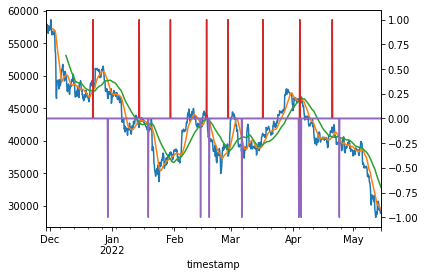

In [21]:
close = ohlcv.close.tail(1000)

sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())


close.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y = True)
(-exits.astype(int)).plot(secondary_y = True)

## 回測

In [36]:
import vectorbt as vbt

In [37]:
close = ohlcv.close

sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

In [38]:
portfolio = vbt.Portfolio.from_signals(close, entries, exits, freq = '4h')

<AxesSubplot:xlabel='timestamp'>

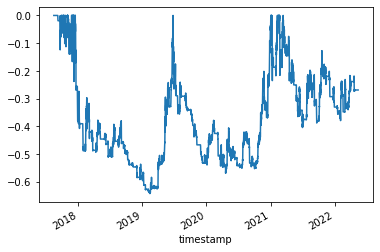

In [39]:
portfolio.drawdown().plot()

<AxesSubplot:xlabel='timestamp'>

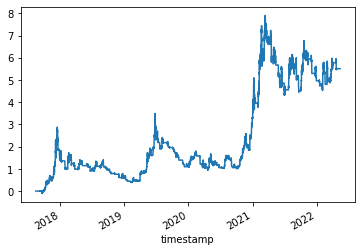

In [26]:
portfolio.cumulative_returns().plot()

In [27]:
portfolio.positions.records

,id,col,size,entry_idx,entry_price,entry_fees,exit_idx,exit_price,exit_fees,pnl,return,direction,status,parent_id
0,0,0,0.023527,136,4246.25201,0.099900,140,4249.44630,0.099975,-0.124724,-0.001248,0,1,0
1,1,0,0.025377,204,3931.69777,0.099776,225,3776.22000,0.095830,-4.141197,-0.041505,0,1,1
2,2,0,0.024191,240,3953.39945,0.095638,417,5684.30001,0.137511,41.639834,0.435388,0,1,2
3,3,0,0.022531,440,6091.08500,0.137237,513,6500.47302,0.146460,8.940119,0.065144,0,1,3
4,4,0,0.019661,547,7434.42700,0.146168,758,14686.23906,0.288745,142.142569,0.972461,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,0,0.014483,9852,43626.63305,0.631846,9860,40138.76106,0.581331,-51.728131,-0.081868,0,1,96
97,97,0,0.015412,9916,37644.09649,0.580169,9957,38823.74739,0.598350,17.002215,0.029306,0,1,97
98,98,0,0.014545,10020,41055.72471,0.597155,10127,46360.94265,0.674319,75.892803,0.127091,0,1,98
99,99,0,0.014565,10130,46206.25009,0.672972,10134,46599.17418,0.678694,4.371083,0.006495,0,1,99


## 策略模組化

In [33]:
from finlab_crypto import Strategy   ##decorator

@Strategy()
def sma_strategy(ohlcv):
    close = ohlcv.close

    sma20 = close.rolling(20).mean()
    sma60 = close.rolling(60).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures

In [34]:
sma_strategy(ohlcv)

In [35]:
portfolio = sma_strategy.backtest(ohlcv, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

TypeError: 'DataFrame' object is not callable

## 策略最佳化

In [3]:
import numpy as np

np.arange(20, 300, 10)

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290])

In [36]:
from finlab_crypto import Strategy   ##decorator

@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv):
    close = ohlcv.close

    sma20 = close.rolling(sma_strategy.sma1).mean()
    sma60 = close.rolling(sma_strategy.sma2).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures

  0%|          | 0/784 [00:00<?, ?it/s]

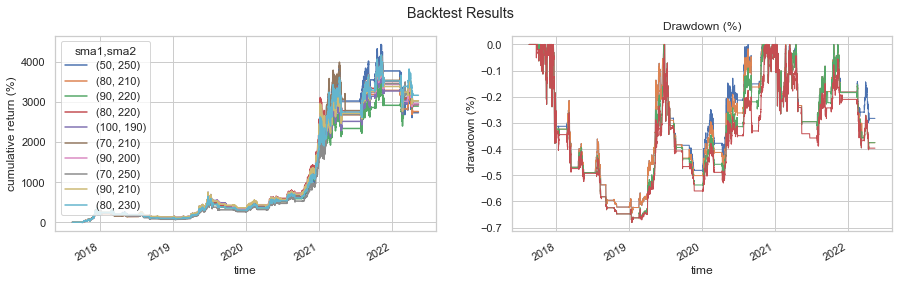

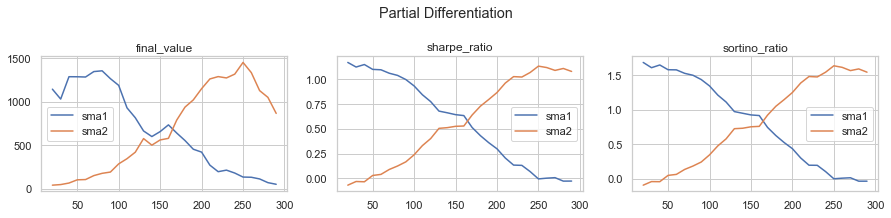

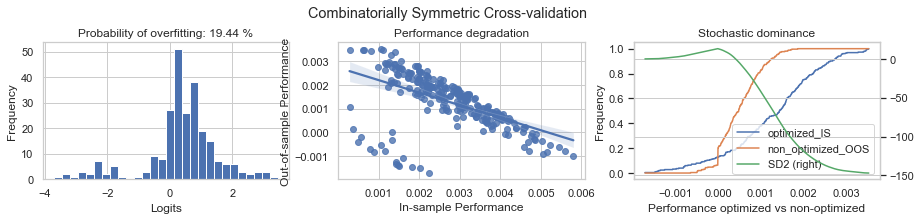

Output()

In [37]:
variables={'sma1' : np.arange(20, 300, 10), 'sma2' : np.arange(20, 300, 10)}
portfolio = sma_strategy.backtest(ohlcv,  variables, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

## ETH

In [38]:
ohlcv_eth = finlab_crypto.crawler.get_all_binance('ETHUSDT', '4h')
ohlcv_eth

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,301.13,307.96,298.00,307.96,1561.95305,1.502957e+12,4.734877e+05,711.0,1260.38649,3.820972e+05,46884.543391
2017-08-17 08:00:00+00:00,307.95,312.00,307.00,308.95,1177.71088,1.502971e+12,3.645453e+05,775.0,1093.84885,3.385876e+05,46866.630800
2017-08-17 12:00:00+00:00,308.95,310.51,303.56,307.06,1882.05267,1.502986e+12,5.786449e+05,1140.0,1742.14642,5.356271e+05,47528.189091
2017-08-17 16:00:00+00:00,307.74,312.18,298.21,301.60,1208.05192,1.503000e+12,3.702091e+05,957.0,1097.32020,3.365462e+05,48886.753370
2017-08-17 20:00:00+00:00,301.60,310.85,299.01,302.00,1200.94182,1.503014e+12,3.677683e+05,939.0,1030.88803,3.158473e+05,50579.872288
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-14 00:00:00+00:00,2009.69,2070.06,2001.45,2054.40,101652.33420,1.652501e+12,2.079508e+08,148589.0,51697.40600,1.057516e+08,0.000000
2022-05-14 04:00:00+00:00,2054.40,2054.90,2014.67,2031.94,66634.05530,1.652515e+12,1.356664e+08,107778.0,32988.93260,6.715721e+07,0.000000
2022-05-14 08:00:00+00:00,2031.94,2053.98,1970.75,1985.62,128678.38000,1.652530e+12,2.587532e+08,174900.0,61510.55950,1.236830e+08,0.000000


  0%|          | 0/784 [00:00<?, ?it/s]

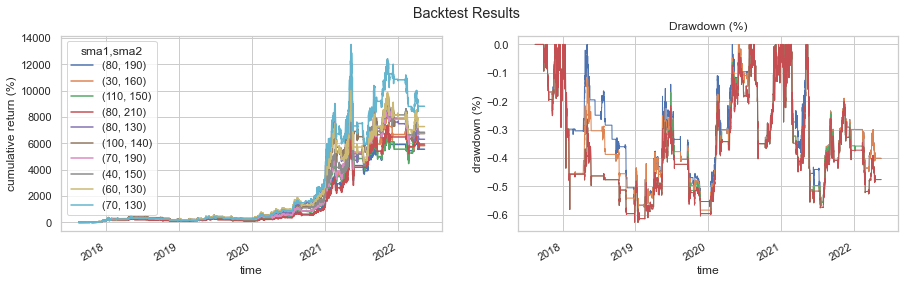

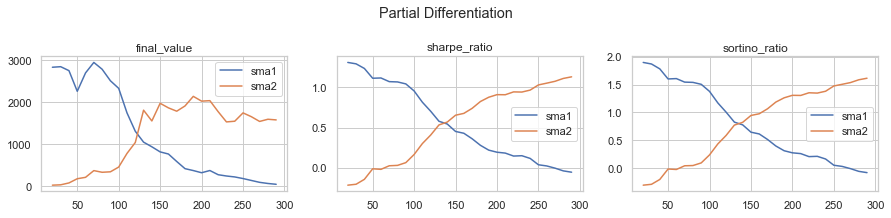

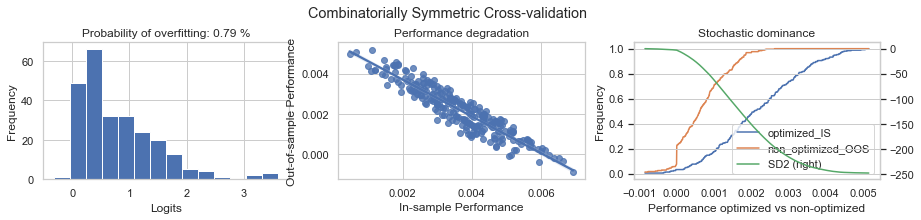

Output()

In [39]:
from finlab_crypto import Strategy   ##decorator

@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv_eth):
    close = ohlcv_eth.close

    sma20 = close.rolling(sma_strategy.sma1).mean()
    sma60 = close.rolling(sma_strategy.sma2).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures

variables={'sma1' : np.arange(20, 300, 10), 'sma2' : np.arange(20, 300, 10)}
portfolio_eth = sma_strategy.backtest(ohlcv_eth,  variables, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

## 趨勢交易策略（利用filter來過濾雜訊)

In [53]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [41]:
import finlab_crypto
finlab_crypto.setup()

<AxesSubplot:>

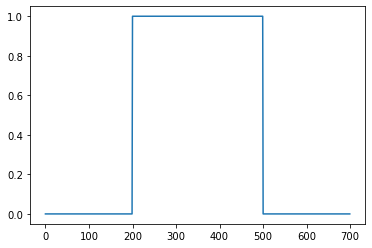

In [5]:
import pandas as pd
s = pd.Series([0]*200 + [1]*300 +[0]*200)
s.plot()

## finlab_crypto indicators

In [7]:
from finlab_crypto import indicators
##查看indicators原始程式碼
indicators??

Type:        module
String form: <module 'finlab_crypto.indicators' from '/Users/gaozhichien/opt/anaconda3/lib/python3.9/site-packages/finlab_crypto/indicators.py'>
File:        ~/opt/anaconda3/lib/python3.9/site-packages/finlab_crypto/indicators.py
Source:     
import sys
import math
import scipy
import numpy as np
import pandas as pd
import scipy.signal as sg
import matplotlib.pyplot as plt

def sma(price, n):
  return price.rolling(n).mean()
def wma(price, n):
  return price.ewm(com=n).mean()

# Highpass filter by John F. Ehlers, converted by DdlV
def highpass(Data, n=48):
  a     = (0.707*2*math.pi) / n

  alpha1 = (math.cos(a)+math.sin(a)-1)/math.cos(a);
  b     = 1-alpha1/2
  c     = 1-alpha1

  ret = [0] * len(Data)
  for i in range(2, len(Data)):
    ret[i] = b*b*(Data.iloc[i]-2*Data[i-1]+Data.iloc[i-2])+2*c*ret[i-1]-c*c*ret[i-2]

  return pd.Series(ret, index=Data.index)

# lowpass filter
def lowpass(Data,n):
  a = 2.0/(1+n)

  lp = [Data[0], Data[1]] + [0] * (len(Data) - 2)
 

## filters

In [44]:
indicators.trends

{'sma': <function finlab_crypto.indicators.sma(price, n)>,
 'wma': <function finlab_crypto.indicators.wma(price, n)>,
 'lowpass': <function finlab_crypto.indicators.lowpass(Data, n)>,
 'hullma': <function finlab_crypto.indicators.hullma(price, n)>,
 'zlma': <function finlab_crypto.indicators.zlma(price, n)>,
 'alma': <function finlab_crypto.indicators.alma(price, n)>,
 'detrend': <function finlab_crypto.indicators.detrend(price, n)>,
 'linear_reg': <function finlab_crypto.indicators.linear_reg(price, n)>}

<AxesSubplot:>

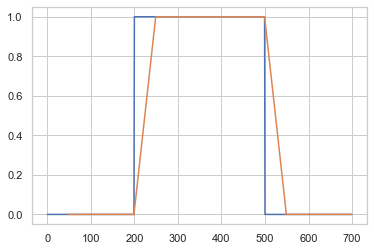

In [46]:
trend = indicators.trends['sma'](s, 50)
s.plot()
trend.plot()

## Multiple filters

In [47]:
for name, func in indicators.trends.items():
    print(name, func)

sma <function sma at 0x7fa004f23820>
wma <function wma at 0x7f9fd01f31f0>
lowpass <function lowpass at 0x7f9fb0ad5a60>
hullma <function hullma at 0x7f9fb0ad5af0>
zlma <function zlma at 0x7f9fb0ad5b80>
alma <function alma at 0x7f9fb0ad5c10>
detrend <function detrend at 0x7f9fb0ad5ca0>
linear_reg <function linear_reg at 0x7f9fb0ad5d30>


ModuleNotFoundError: No module named 'talib'

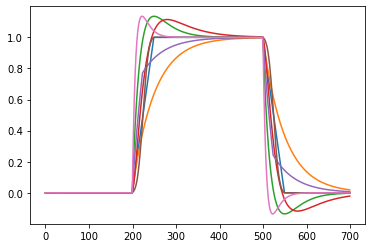

In [12]:
filter_results = pd.DataFrame()
filter_results["original_price"] = s


for name, func in indicators.trends.items():
    trend = func(s, 50)
    filter_results[name]  = trend
    trend.plot()
filter_results

In [13]:
filter_results

,original_price,sma,wma,lowpass,hullma,zlma,alma,detrend
0,0,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.000000e+00
1,0,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.000000e+00
2,0,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.000000e+00
3,0,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.000000e+00
4,0,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
695,0,0.0,0.020569,-0.002738,-0.022644,0.008054,0.0,-4.596104e-07
696,0,0.0,0.020166,-0.002646,-0.022224,0.007896,0.0,-4.227709e-07
697,0,0.0,0.019771,-0.002557,-0.021811,0.007741,0.0,-3.888730e-07
698,0,0.0,0.019383,-0.002471,-0.021406,0.007590,0.0,-3.576826e-07


In [15]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')
ohlcv

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,2.756474e+05,8048.127886
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,2.610541e+05,8020.698096
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,5.554198e+05,8133.190658
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,7.078082e+05,8425.112852
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,8.782870e+05,8733.911395
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-14 00:00:00+00:00,29287.05,29824.69,29219.37,29569.89,7434.385590,1.652501e+12,2.198663e+08,181186.0,3987.279200,1.179177e+08,0.000000
2022-05-14 04:00:00+00:00,29569.89,29611.70,29200.00,29431.59,5347.186370,1.652515e+12,1.573787e+08,168071.0,2770.580240,8.154662e+07,0.000000
2022-05-14 08:00:00+00:00,29431.58,29599.51,28830.00,29074.24,10335.950090,1.652530e+12,3.021862e+08,254625.0,4944.818840,1.446730e+08,0.000000


<AxesSubplot:>

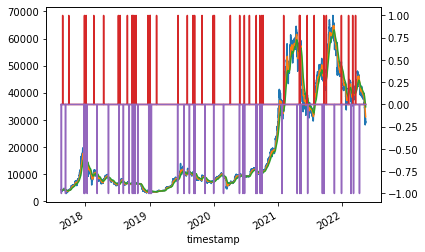

In [18]:
filter_name = "wma"   ##可用這邊改不同的策略名稱

close = ohlcv.close

sma20 = indicators.trends[filter_name](close, 20)
sma60 = indicators.trends[filter_name](close, 60)

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())


close.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y = True)
(-exits.astype(int)).plot(secondary_y = True)

## 趨勢策略最佳化

In [23]:
from finlab_crypto import Strategy

##原本
@Strategy()
def trend_strategy(ohlcv):
    filter_name = "wma"   ##可用這邊改不同的策略名稱

    close = ohlcv.close

    sma20 = indicators.trends[filter_name](close, 20)
    sma60 = indicators.trends[filter_name](close, 60)

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    return entries, exits

trend_strategy.backtest(ohlcv, freq = '4h', plot = True)

In [20]:
trend_strategy(ohlcv)

(timestamp
 2017-08-17 04:00:00+00:00    False
 2017-08-17 08:00:00+00:00    False
 2017-08-17 12:00:00+00:00    False
 2017-08-17 16:00:00+00:00    False
 2017-08-17 20:00:00+00:00    False
                              ...  
 2022-05-14 00:00:00+00:00    False
 2022-05-14 04:00:00+00:00    False
 2022-05-14 08:00:00+00:00    False
 2022-05-14 12:00:00+00:00    False
 2022-05-14 16:00:00+00:00    False
 Name: close, Length: 10373, dtype: bool,
 timestamp
 2017-08-17 04:00:00+00:00    False
 2017-08-17 08:00:00+00:00    False
 2017-08-17 12:00:00+00:00    False
 2017-08-17 16:00:00+00:00     True
 2017-08-17 20:00:00+00:00    False
                              ...  
 2022-05-14 00:00:00+00:00    False
 2022-05-14 04:00:00+00:00    False
 2022-05-14 08:00:00+00:00    False
 2022-05-14 12:00:00+00:00    False
 2022-05-14 16:00:00+00:00    False
 Name: close, Length: 10373, dtype: bool)

In [27]:
list(indicators.trends.keys())

['sma', 'wma', 'lowpass', 'hullma', 'zlma', 'alma', 'detrend', 'linear_reg']

In [43]:
##最佳化

@Strategy(filter_name = "sma", n1=20, n2=60)
def trend_strategy(ohlcv):
    filter_name = trend_strategy.filter_name   ##可用這邊改不同的策略名稱
    v1 = trend_strategy.n1
    v2 = trend_strategy.n2

    close = ohlcv.close

    sma20 = indicators.trends[filter_name](close, v1)
    sma60 = indicators.trends[filter_name](close, v2)

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    return entries, exits

variables = {
    "filter_name" : indicators.trends.keys(),  ##['sma', 'wma', 'lowpass', 'hullma', 'zlma', 'alma', 'detrend', 'linear_reg']
    "n1" : np.arange(20, 300, 20),
    "n2" : np.arange(20, 300, 20)
}
portfolio = trend_strategy.backtest(ohlcv, variables=variables, freq = '4h', plot = True)

  0%|          | 0/1568 [00:00<?, ?it/s]

ModuleNotFoundError: No module named 'talib'

## 驗證策略(filter)是否有效 (Boostrap)

利用Bootstrap驗證價格究竟是random walk還是真的有趨勢在，才能達到足夠的信心水準
1. Detrend daily returns
2. 
3. 

In [44]:
#1. detrend
ret = portfolio.daily_returns
ret_detrend = (ret-ret.mean())
samples = (ret_detrend).unstack().dropna()
samples

AttributeError: 'function' object has no attribute 'mean'

In [52]:
detrend = portfolio.daily_returns = portfolio.daily_returns.mean()
samples = detrend.unstack().values

AttributeError: 'function' object has no attribute 'mean'

In [42]:
portfolio.daily_returns().iloc[:,1].plot()

timestamp
2017-08-17 00:00:00+00:00    0.0
2017-08-18 00:00:00+00:00    0.0
2017-08-19 00:00:00+00:00    0.0
2017-08-20 00:00:00+00:00    0.0
2017-08-21 00:00:00+00:00    0.0
                            ... 
2022-05-10 00:00:00+00:00    0.0
2022-05-11 00:00:00+00:00    0.0
2022-05-12 00:00:00+00:00    0.0
2022-05-13 00:00:00+00:00    0.0
2022-05-14 00:00:00+00:00    0.0
Freq: D, Name: close, Length: 1732, dtype: float64

In [41]:
portfolio.daily_returns().iloc[:,1].sum()

<bound method Portfolio.daily_returns of <vectorbt.portfolio.base.Portfolio object at 0x7f8d89ffaeb0>>

In [ ]:
portfolio.daily_returns().iloc[:,1].cumsum(),plot

<AxesSubplot:xlabel='timestamp'>

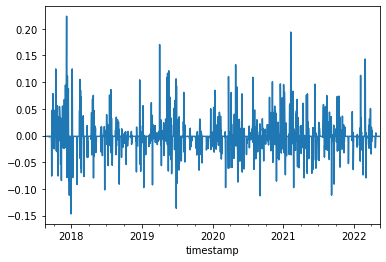

In [47]:
s = portfolio.daily_returns()

(s-s.mean()).plot()

<AxesSubplot:xlabel='timestamp'>

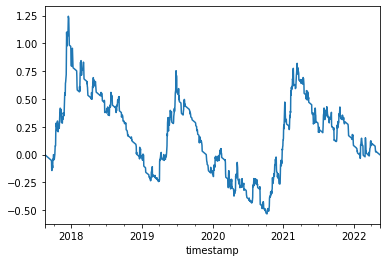

In [50]:
(s-s.mean()).cumsum().plot()

In [ ]:
##算雜訊中的績效
import random
ndays = len(portfolio.daily_returns)
randon.choices(sample, k=ndays) 

random_returns = []
for i in range(1000):
    random_returns.append(sum(randon.choices(sample, k=ndays)))   #計算出1000種的累積績效

pd.Series(random_returns).hist()

In [56]:
best_result = portfolio.final_value.sort_values().index[-1]

portfolio.daily_returns[best_result].sum()

AttributeError: 'function' object has no attribute 'sort_values'

In [58]:
pd.Series(random_returns).hist()

NameError: name 'randon_returns' is not defined

In [60]:
import matplotlib.pyplot as plt

plt.vlines(best_result_value, 0, 50, color = "red")

NameError: name 'best_result_value' is not defined